# Author: Aqib Aziz

------------------------------------------------------------------------------------
## Decision Tree Classifier for IRIS dataset
#### Task no 6 (intermediate level) - The Sparks Foundation Tasks
In this task a model based on Decision Tree is created to classify the classes of iris flowers.

----------------------------------------------
### Import required modules

In [107]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

### Reading Data

In [108]:
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### EDA

In [109]:
## count data points
iris.count()

SepalLength    150
SepalWidth     150
PetalLength    150
PetalWidth     150
Name           150
dtype: int64

In [110]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [111]:
iris.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')

#### Checking for missing values or Nan values

In [112]:
iris[iris.isnull().any(axis=1)].head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name


#### The data is clean and has no NaN values

--------------------------------
### Visualizing the data

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

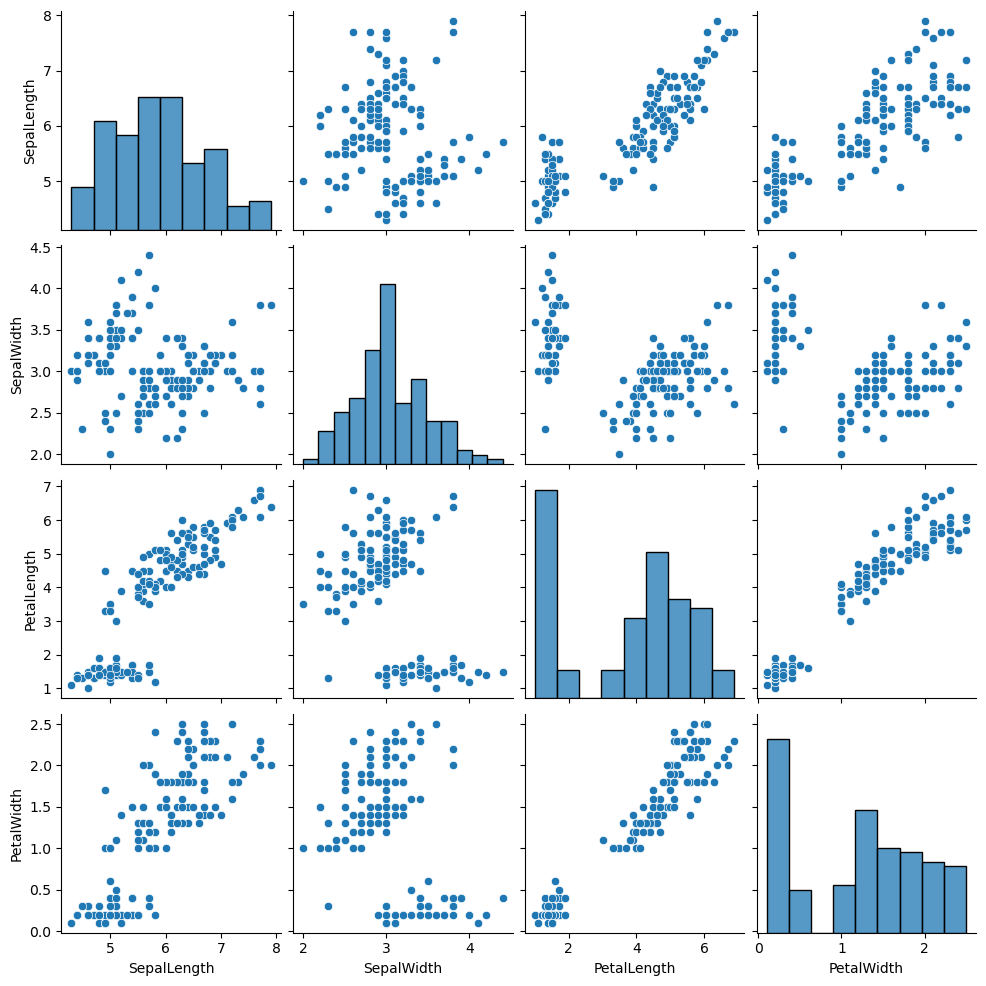

In [114]:
sns.pairplot(iris)

--------------------------------------------------------
### Extracting Features and Labels for the Model

In [115]:
features = iris.iloc[: , : -1].values
labels = iris.iloc[: , 4].values

In [116]:
features[:10]  # print 1st 10 rows

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

- As the labels are in string format, we have to encode it to numeric

In [117]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)

In [118]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

--------------------
### Model

In [119]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state = 101)

In [120]:
model = DecisionTreeClassifier(max_leaf_nodes = 10, random_state = 0)

In [121]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

### Visualizing the Trained Decision Tree

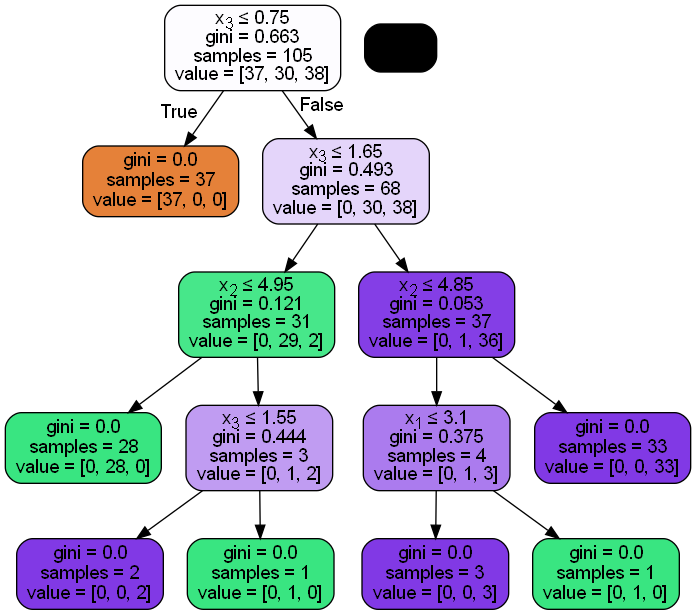

In [122]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Prediction on Test data (x_test)

In [123]:
y_predicted = model.predict(x_test)

In [124]:
y_predicted

array([0, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2,
       1])

In [125]:
accuracy = accuracy_score(y_test, y_predicted) * 100
print("Accuracy: ", round(accuracy, 2), " %")

Accuracy:  95.56  %


In [126]:
confusion_matrix(y_test, y_predicted)

array([[13,  0,  0],
       [ 0, 19,  1],
       [ 0,  1, 11]], dtype=int64)

-------------------------
### Now testing the model with a sample test point

In [127]:
# creating test point
test_point = np.array([5.4, 3.4, 1.6, 0.3]).reshape(1, -1)

In [128]:
result = model.predict(test_point)
if result == 0:
    print("Setosa")
if result == 1:
    print("Versicolor")
if result == 2:
    print("Verginica")

Setosa


------------------------------------
### TASK ENDED